# Analysis 3

In [8]:
# Merge the Green Taxi Files for the Month Jan - June
import glob
import pandas as pd
from pandas import DataFrame
frame = pd.DataFrame()
list=[]
for files in glob.iglob("../../Data/GreenTaxi/*.csv"):
    df = pd.read_csv(files,sep=',')
    list.append(df)
frame = pd.concat(list)

In [46]:
#Pick up Random Sample Records
df = frame.sample(n=100000)
df.to_csv("outputs/randomsample.csv",sep=",")

#Calculate Tip Percent for Every record
outputFile="outputs/randomsample.csv"
tipPercentage=pd.read_csv(outputFile,sep=',')[['Tip_amount','Total_amount']]
tipPercentage['tipPercent']=round((tipPercentage['Tip_amount']/tipPercentage['Total_amount'])*100)

#Divide the Tip into Categories and Seperate into Bins
import numpy as np
import pandas as pd
from pandas import DataFrame
tipBins = [-5,0.1,5,10,15,20,25,30]
tipData=DataFrame(tipPercentage)
tip_data_names = ["No Tip", '1 to 5','5 to 10','10 to 15','15 to 20','20 to 25','25 to 30']
tipData['ranges'] = pd.cut(tipData['tipPercent'], tipBins, labels=tip_data_names)
td=tipData.groupby(['ranges'])['ranges'].agg({'count'}).reset_index()
td['perc']= (td['count']*100/td['count'].sum()).round()
df['pickup_date'] = pd.to_datetime(df['pickup_date'], errors='coerce')

#Get the day of week
df['weekday'] = df['pickup_date'].dt.weekday_name

#Generate new dataFrame with required columns
df1=DataFrame(df,columns=['pickup_time','Tip_amount','weekday'])

#Generate Hour
df1['time_hour'] = pd.to_datetime(df1['pickup_time']).dt.hour
time_weekday_tip=DataFrame(df1,columns=['Tip_amount','time_hour','weekday'])

In [48]:
#Form a Pivot Table
twt=DataFrame(time_weekday_tip.groupby(["weekday", "time_hour"])["Tip_amount"].mean())
twt = twt.reset_index()
twt.columns = twt.columns.str.strip()
output=DataFrame(twt.pivot(index='time_hour', columns='weekday', values='Tip_amount'))
output.to_csv("outputs/out.csv")


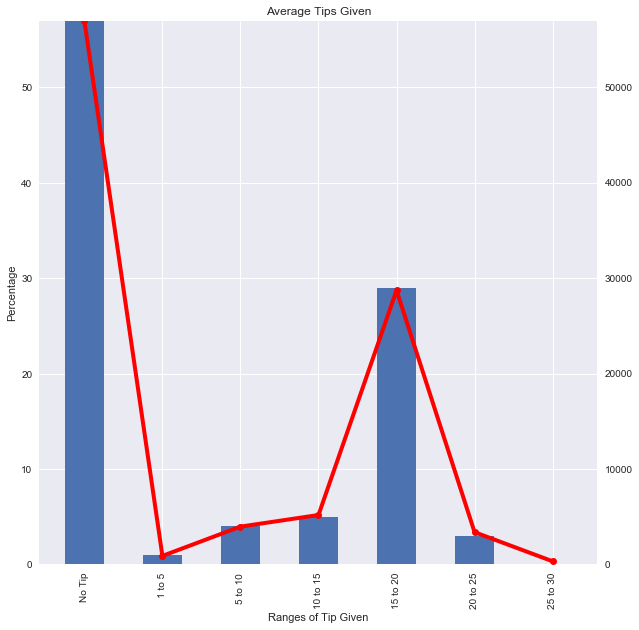

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
ax = td['perc'].plot(kind="bar", alpha=1)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),td['count'],marker='o', c='red', linewidth=4)
ax.set_xlabel("Ranges of Tip Given")
ax.set_ylabel("Percentage")
ax.set_title("Average Tips Given")
ax.set_xticklabels(td['ranges'].tolist())
ax.set_ylim(0,td["perc"].max())
ax2.set_ylim(0,td["count"].max())
ax2.grid(False)
fig1 = plt.gcf()
fig1.savefig("graph/analysis3_Average_tip_given")
plt.show()

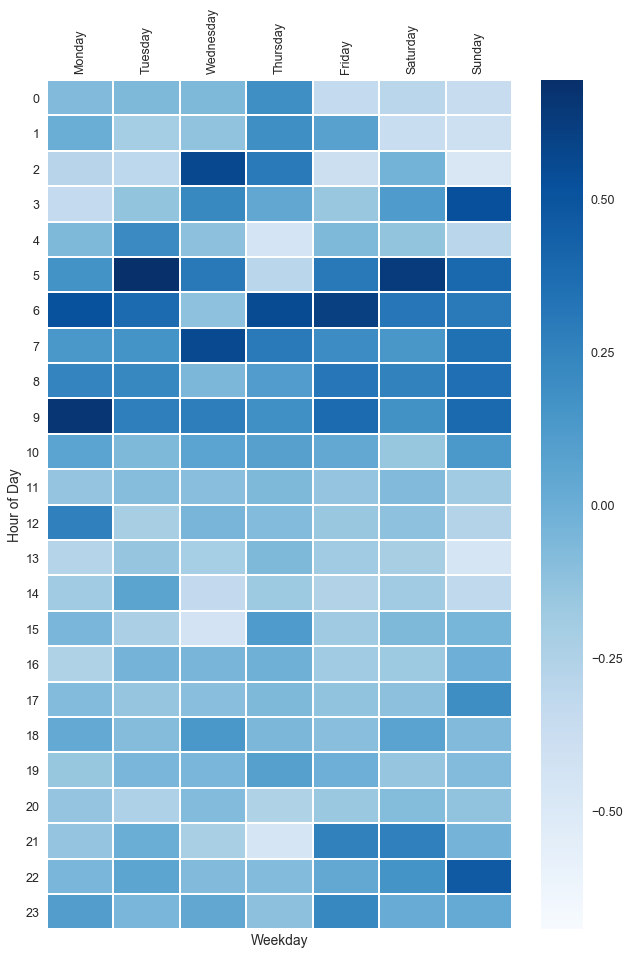

In [50]:
## Graph Analysis for Tip Percentage on a weekday basis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import the data directly into a pandas dataframe
nba = pd.read_csv("outputs/out.csv", index_col='time_hour')
# remove index title
nba.index.name = ""
# normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())
# relabel columns
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
nba_norm.columns = labels
# set appropriate font and dpi
sns.set(font_scale=1.2)
sns.set_style({"savefig.dpi": 75})
sns.set
# plot it out
ax = sns.heatmap(nba_norm, cmap=plt.cm.Blues, linewidths=1)
# set the x-axis labels on the top
ax.xaxis.tick_top()
ax.set(xlabel='Weekday', ylabel='Hour of Day')
# rotate the x-axis labels
plt.xticks(rotation=90)
# get figure (usually obtained via "fig,ax=plt.subplots()" with matplotlib)
fig = ax.get_figure()
# specify dimensions and save
fig.set_size_inches(10, 15)
fig.savefig("graph/heatmap.png")